#### Importing Libs

In [ ]:
import pandas as pd
from core.EDA import EDA
from core.SQLeto import SQLeto
from decouple import config

ModuleNotFoundError: No module named 'pandas'

#### Load Enviroment Vars

In [2]:
RAW_DATA_PATH = config('RAW_DATA_PATH')
DATABASE_POSTGRES = config('DATABASE_POSTGRES')
USER_POSTGRES = config('USER_POSTGRES')
PWD_POSTGRES = config('PWD_POSTGRES')

#### Load data from POSTGRESQL

In [3]:
# Create object to access database
sqleto = SQLeto(
    database=DATABASE_POSTGRES, 
    user=USER_POSTGRES,
    password=PWD_POSTGRES)
    
# Getting data in a dataframe
data = sqleto.execute_DQL(
    '''
        SELECT * FROM creditcard
    '''
)

#### Creating dict to mapping classes

In [4]:
mapping_classes = {
    0: 'No Fraud', 1: 'Fraud'}

#### Plotting EDA

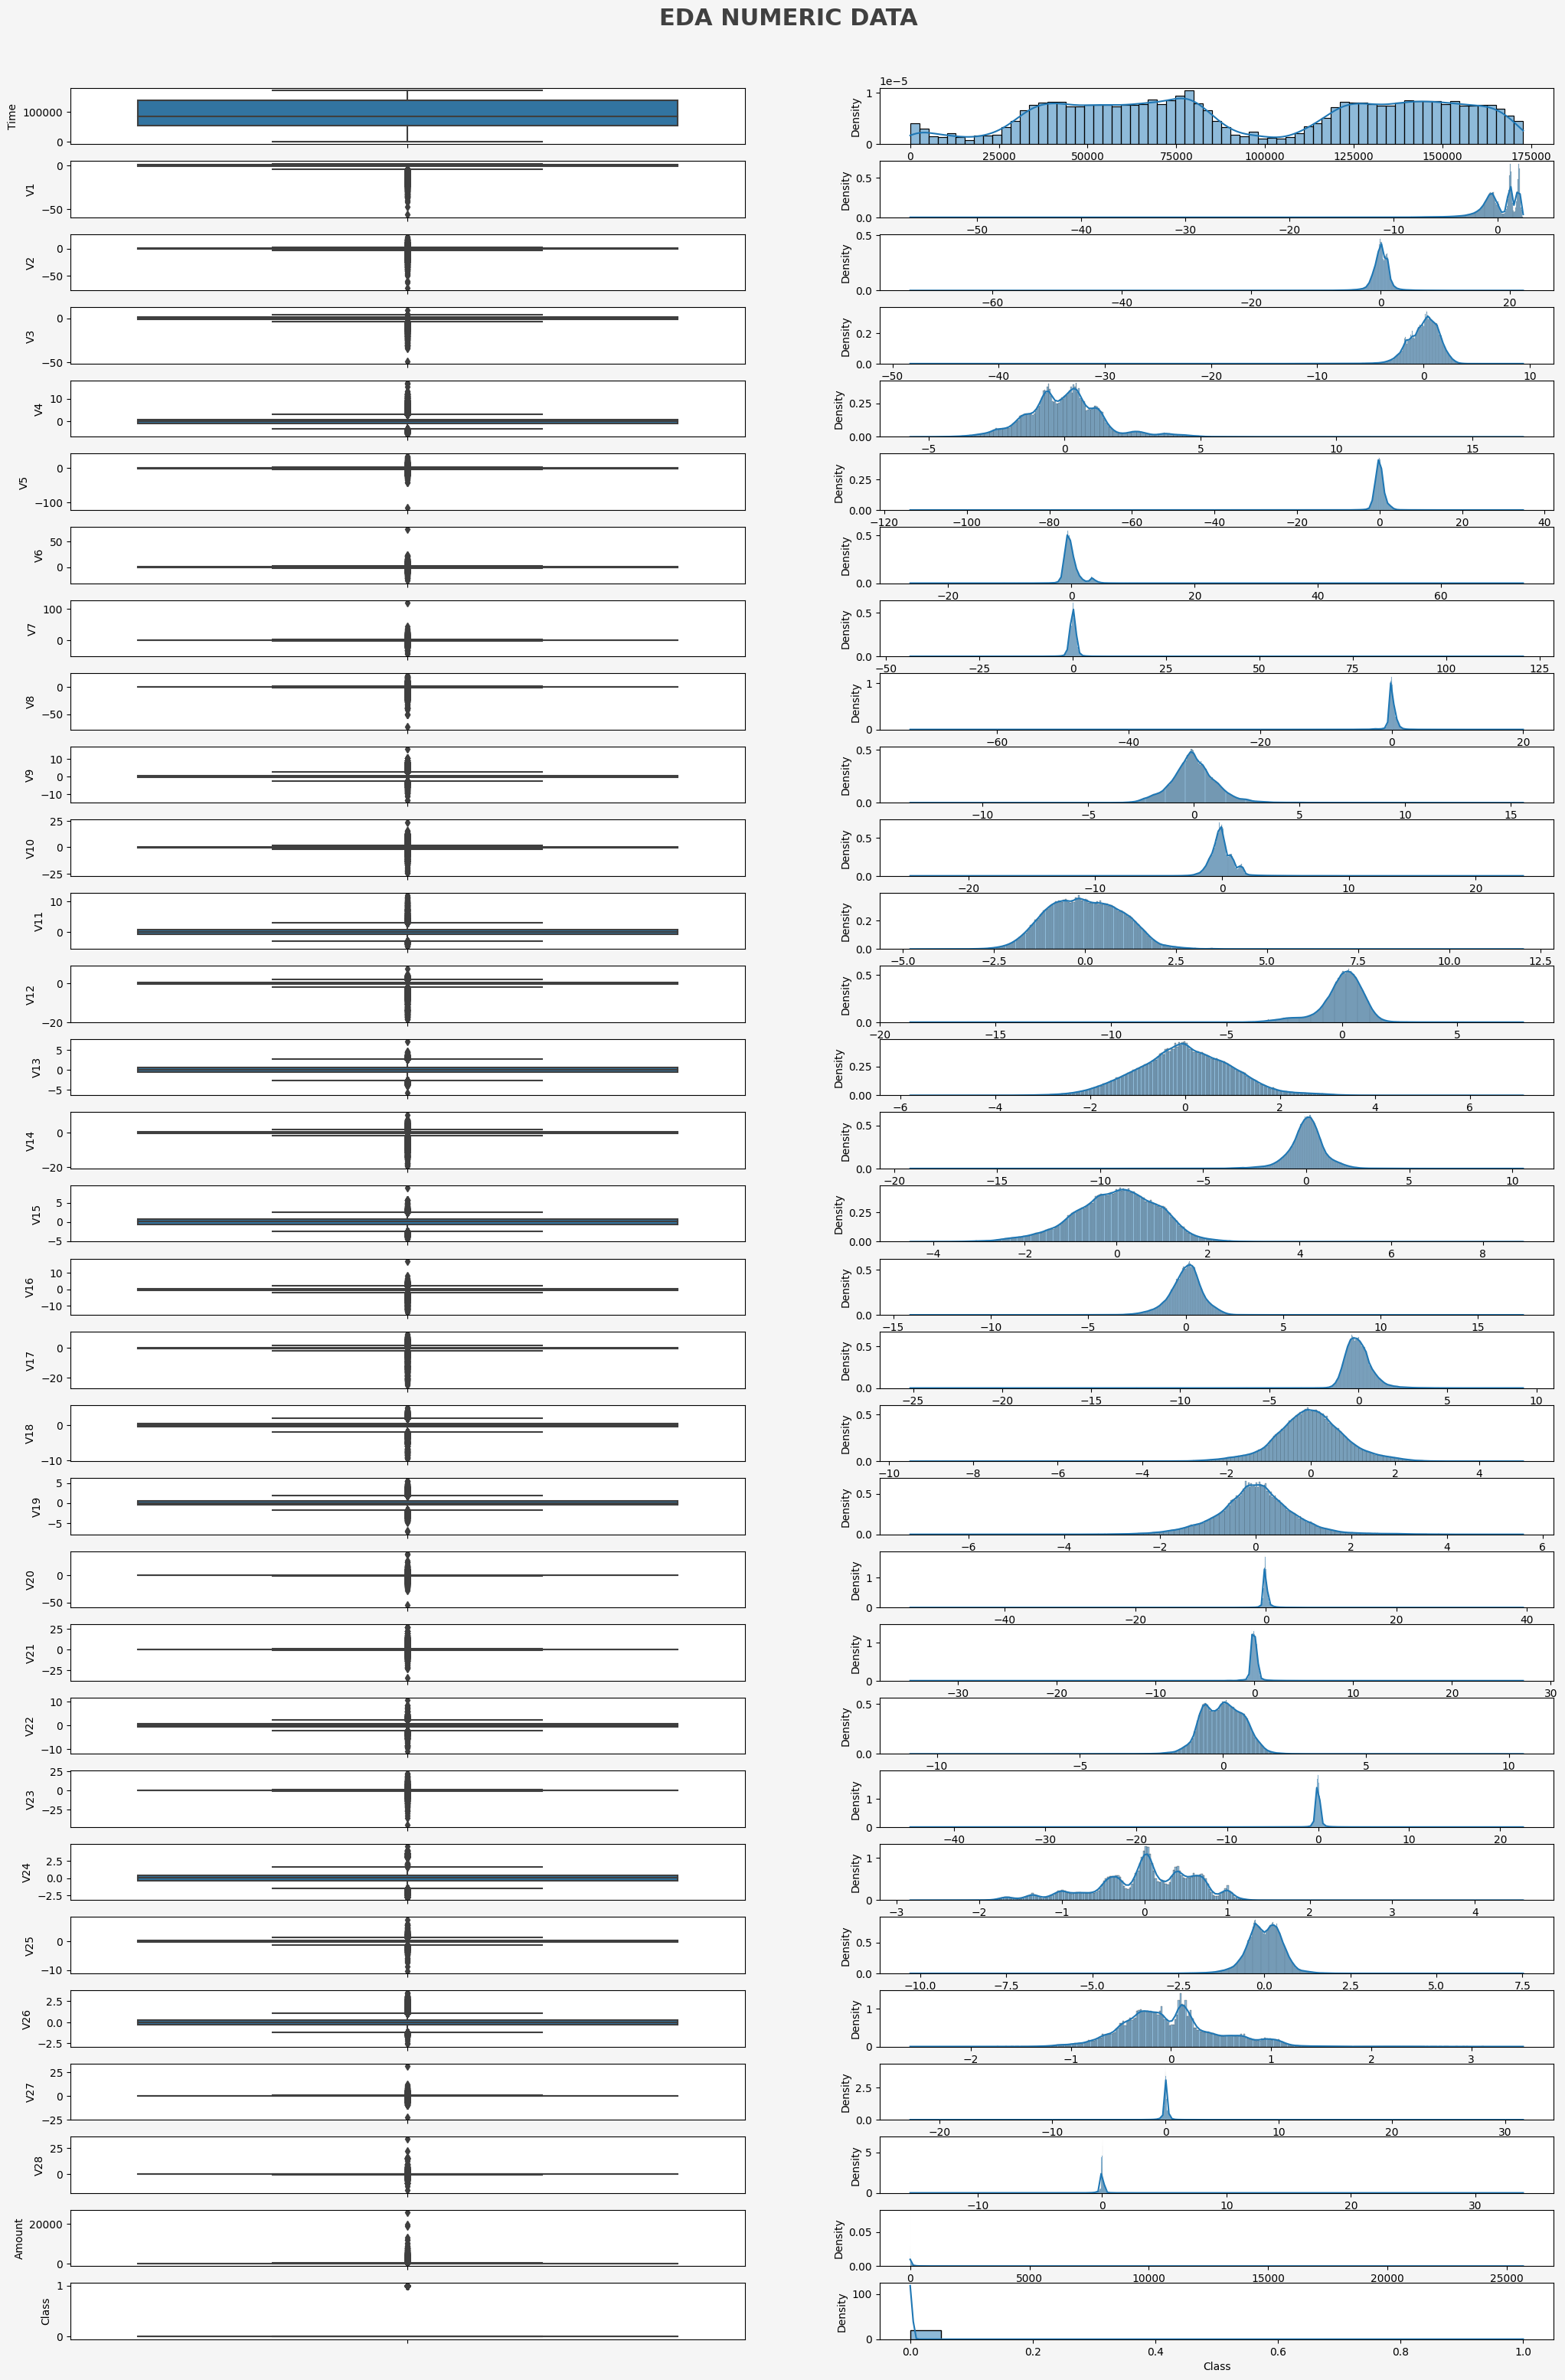

In [5]:
EDA.plotting_numeric_data(data=data,numeric_columns=data.columns, title_of_plot='EDA NUMERIC DATA')

In [6]:
EDA.describe_column(dataframe=data, column='Amount')

Amount statistics: 

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


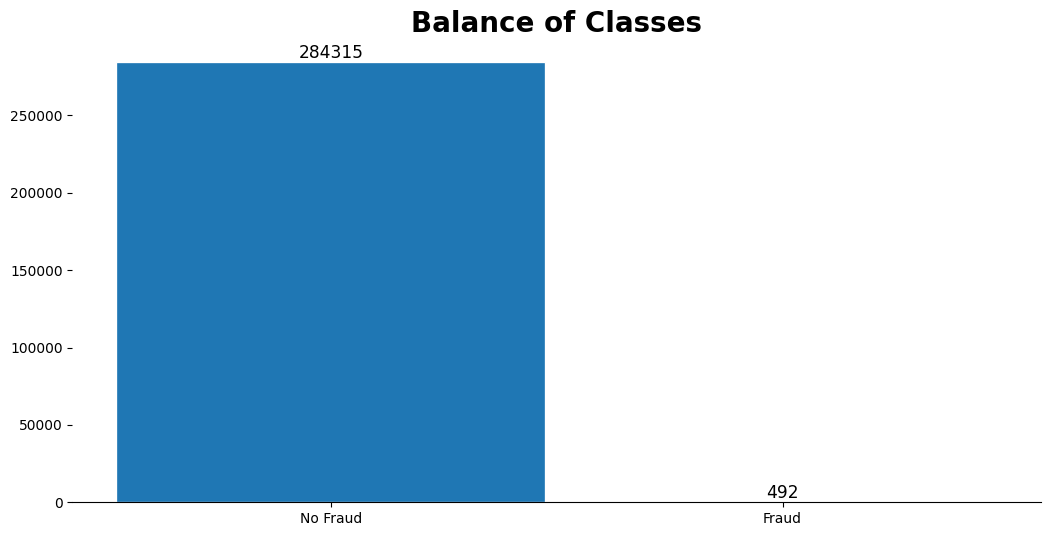

In [7]:
EDA.verify_balance_data(
    dataframe=data, column='Class', 
    dict_map_classes=mapping_classes, 
    title_plot='Balance of Classes')

In [8]:
EDA.percentage_classes(dataframe=data, 
column='Class', 
dict_map_classes=mapping_classes)

Percentage of No Fraud: 99.8%
Percentage of Fraud: 0.2%
